YEAR:  2021  // start_date: 2021-01-01 00:00:00 end_date: 2022-01-01 00:00:00
          Date      E10      E85     GPLC   Gazole     SP95     SP98
0   2021-01-01  1.39303  0.69628  0.85642  1.32152  1.40044  1.49395
1   2021-01-02  1.34989  0.68052  0.84112  1.26886  1.36858  1.42101
2   2021-01-03  1.37511  0.69601  0.85525  1.29172  1.36626  1.45464
3   2021-01-04  1.35605  0.68287  0.83911  1.27815  1.37478  1.42902
4   2021-01-05  1.36755  0.68892  0.84814  1.28583  1.38040  1.44192
..         ...      ...      ...      ...      ...      ...      ...
360 2021-12-27  1.60370  0.71276  0.90023  1.53538  1.62782  1.69726
361 2021-12-28  1.61576  0.71552  0.90273  1.54472  1.63543  1.71038
362 2021-12-29  1.63680  0.71504  0.89949  1.56334  1.62966  1.73335
363 2021-12-30  1.62972  0.71767  0.90034  1.55665  1.63589  1.72217
364 2021-12-31  1.64198  0.71725  0.90920  1.57412  1.64922  1.74425

[365 rows x 7 columns]


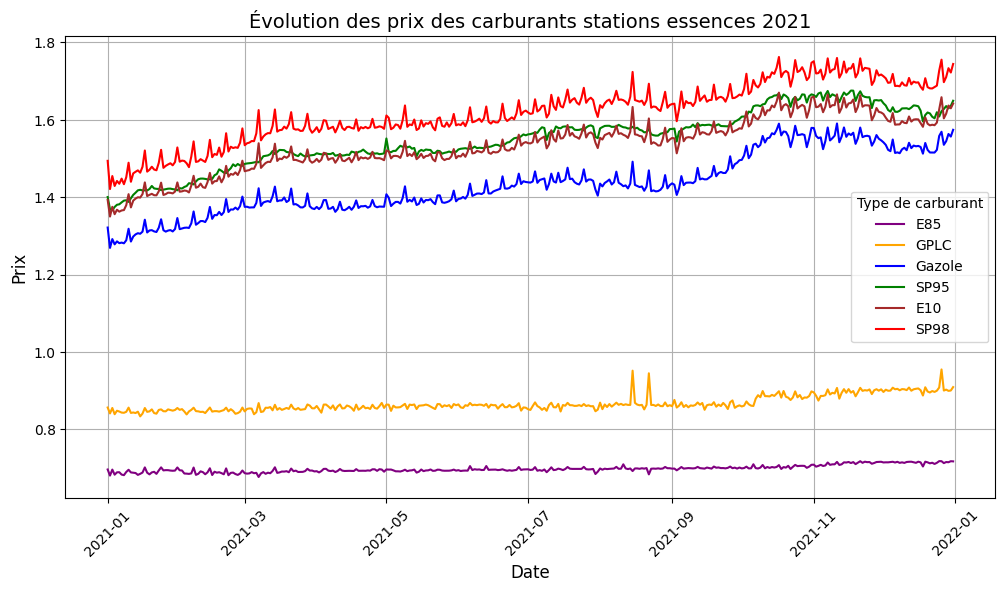

In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pymongo
from datetime import datetime

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=RuntimeWarning)

# graph: https://seaborn.pydata.org/examples/errorband_lineplots.html

# Setup MongoDB connection (local)
mongo_host = "localhost"
mongo_port = 27017
mongo_user = "admin"
mongo_password = "password"
auth_db = "admin"
client_mongo = pymongo.MongoClient(
    host=mongo_host,
    port=mongo_port,
    username=mongo_user,
    password=mongo_password,
    authSource=auth_db
)
db_mongo_denorm = client_mongo.get_database("denormalization")
collection_mongo = db_mongo_denorm.get_collection("denorm_station_prices")

# ALL YEARS
# years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']
# years = ['2007', '2008', '2009', '2010', '2011', '2012']
# ONE YEAR
years = ['2021']

for year in years:
    year = int(year)
    print("YEAR: ", year, " // start_date:", datetime(year, 1, 1), "end_date:", datetime(year+1, 1, 1))

    cursor = collection_mongo.find(
            {
                "Date": {"$gte": datetime(year, 1, 1), "$lt": datetime(year+1, 1, 1)}
            },
            {
                "_id": 0
            }
        )
    df_gas_station_price = pd.DataFrame(list(cursor))

    df_gas_station_price["Date"] = pd.to_datetime(df_gas_station_price["Date"], format="%Y_%m_%d")
    
    df_gas_station_price = df_gas_station_price.rename(columns={
    'station_ttc_E85_eur_liter': 'E85',
    'station_ttc_GPLC_eur_liter': 'GPLC',
    'station_ttc_GAZOLE_eur_liter': 'Gazole',
    'station_ttc_SP95_eur_liter': 'SP95',
    'station_ttc_E10_eur_liter': 'E10',
    'station_ttc_SP98_eur_liter': 'SP98'
    })
    print(df_gas_station_price)
    
    
    # schéma global
    couleurs = {
    "E85": "purple",
    "GPLC": "orange",
    "Gazole": "blue",
    "SP95": "green",
    "E10": "yellow",
    "SP98": "red"
    }
    df = df_gas_station_price.copy()
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['E85'], label='E85', color='purple')
    plt.plot(df['Date'], df['GPLC'], label='GPLC', color='orange')
    plt.plot(df['Date'], df['Gazole'], label='Gazole', color='blue')
    plt.plot(df['Date'], df['SP95'], label='SP95', color='green')
    plt.plot(df['Date'], df['E10'], label='E10', color='brown')
    plt.plot(df['Date'], df['SP98'], label='SP98', color='red')

    plt.title(f"Évolution des prix des carburants stations essences {year}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Prix", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Type de carburant")
    plt.grid(True)
    plt.show()
    
    
    # schéma de visualisation de pattern de prix
#     df_prices = df.melt(id_vars=["Date"], var_name="nom", value_name="valeur")
#     df_prices['Date'] = pd.to_datetime(df_prices['Date'], errors='coerce')
#     df_prices['valeur'] = pd.to_numeric(df_prices['valeur'], errors='coerce')
#     df_prices = df_prices.dropna(subset=['Date', 'valeur'])
#     df_prices = df_prices[df_prices['nom'].isin(['Gazole', 'SP95', 'SP98'])]

#     couleurs = {
#         "Gazole": "blue",
#         "SP95": "green",
#         "SP98": "red"
#     }

#     plt.figure(figsize=(12, 6))
#     sns.lineplot(data=df_prices, x="Date", y="valeur", hue="nom", marker="o", palette=couleurs, ci=None)
#     plt.title(f"Évolution des prix des carburants {year}", fontsize=14)
#     plt.xlabel("Date", fontsize=12)
#     plt.ylabel("Prix (€/L)", fontsize=12)
#     plt.xticks(rotation=45)
#     plt.legend(title="Type de carburant")
#     plt.grid(True)
#     plt.show()
    